In [31]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import os
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient


In [54]:
#Local variables: figure out how to automate.
JobIDint = 5951385
JOBID = str(5951385)
tree_sizes = list(range(3,51))
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = False;

In [55]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    hoffman2_path_output = '/u/home/m/mchari/bird/Parallel_Hoffman_full/' + JOBID + '_output_files'
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get('/u/home/m/mchari/bird/Parallel_Hoffman_full/5951385_output_files', recursive = True)
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target
cwd = os.getcwd()
target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

transfer already complete


In [56]:

#look at one mpd randomization from one trial to see sample data structure. 
target_file_get = os.getcwd() + "/"+ "5055818" +"_output_files/"+  "10_4out.csv"
df = pd.read_csv(target_file_get)
print(df)
df.iloc[0]['mpd.rnd']


   Unnamed: 0     plot  ntaxa       mpd  mpd.rnd   mpd.sd     nri  \
0           1  species     10  334.6871  231.073  12.6345 -8.2009   

   mpd.ranklow  mpd.rankhi      mntd  mntd.rnd  mntd.sd     nti  mntd.ranklo  \
0            0           2  239.1375  204.6416  11.6184 -2.9691            0   

   mntd.rankhi  runs  
0            2     2  


231.073

In [57]:
# Create your dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [58]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    if target_statistic == "mpd":
        target_val = 'mpd.rnd'
    else :
        target_val = 'mntd.rnd'
    for i in tree_sizes:
        size = str(i)
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory):
            if file.startswith(size + "_"):
                direct = target_directory + file 
                temp_df = pd.read_csv(direct)
                mpd_temp = temp_df.iloc[0][target_val]
                mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                count  = count + 1
                array_temp.append(mpd_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [59]:
#TODO: write this to a csv somehow so I can delete that massive file. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')



In [61]:
#
new_mpd = new_mpd_smallvals
new_mntd = new_mntd_smallvals

204.46372 294.23731


/var/folders/y2/xc9jb_w133n8tymks1sbxh7m0000gp/T/ipykernel_13120/4153670113.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))


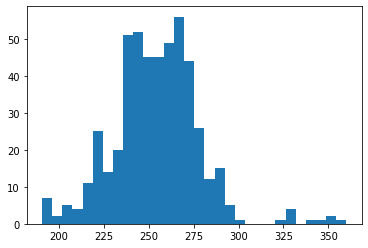

In [32]:
data = new_mpd['mpd10']
plt.hist(data, bins =30)
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 


#using classical statistics and assuming normal distribution 
std = statistics.stdev(data)
mean = np.mean(data)
lower_level = mean-1.960*(std/(np.sqrt(len(data)+1)))
lower_level
upper_level = mean+1.960*(std/(np.sqrt(len(data)+1)))
upper_level
#X  ±  Z s√n 


upper_bound_bootstrap = np.percentile(data,97.5)
lower_bound_bootstrap = np.percentile(data,2.5)

print(lower_bound_bootstrap, upper_bound_bootstrap)



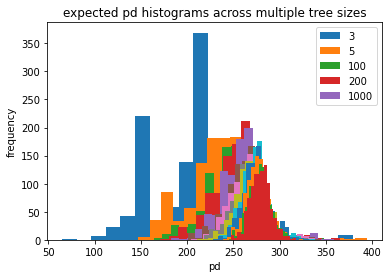

In [120]:
#print(dict_mpd.keys())
#print(np.mean(dict_mpd['mpd10']))
#print(np.mean(dict_mpd['mpd10']))
#print(new_mpd['mpd10'])
plt.hist(new_mpd['mpd3'],bins = 20)
plt.hist(new_mpd['mpd5'],bins = 20)
plt.hist(new_mpd['mpd7'],bins = 20)
plt.hist(new_mpd['mpd9'],bins = 20)
plt.hist(new_mpd['mpd11'],bins = 20)
plt.hist(new_mpd['mpd13'],bins = 20)
plt.hist(new_mpd['mpd15'],bins = 20)
plt.hist(new_mpd['mpd17'],bins = 20)
plt.hist(new_mpd['mpd19'],bins = 20)
plt.hist(new_mpd['mpd25'],bins = 20)
plt.hist(new_mpd['mpd30'],bins = 20)
plt.hist(new_mpd['mpd35'],bins = 20)
plt.hist(new_mpd['mpd45'],bins = 20)
plt.hist(new_mpd['mpd50'],bins = 20)
#plt.hist(new_mpd['mpd50'])
#plt.hist(new_mpd['mpd100'])
#plt.hist(new_mpd['mpd1000'])
plt.title('expected pd histograms across multiple tree sizes')
plt.xlabel('pd')
plt.ylabel('frequency')
labels = ("3","5","100","200","1000")
plt.legend(labels)
plt.savefig('pd_histograms.jpg', dpi=300)

In [126]:
#TODO: make function to get confidence interval and means. 
#CI TODO: check whether z or t is used. don't know variance or mean. Should use t distribution. 
def CI_conglomerate(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        mean_temp = np.mean(dictionary[key])
        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
        low_array.append(CI_temp[0])
        high_array.append(CI_temp[1])
        mean_array.append(mean_temp)
    return(low_array,high_array,mean_array)

new_CI = CI_conglomerate(new_mpd)
print(new_CI)

([189.30376896842435, 211.23623688235227, 226.1560194546785, 234.48823081701912, 241.83588780190848, 247.81570051632798, 250.72475466598263, 255.0558958796774, 258.08404431733857, 260.1937572759048, 261.6661546769167, 262.5928976014143, 265.30198581085125, 264.91207986357637, 265.23469154457234, 267.58417510508315, 268.34578669254216, 269.8276189072309, 271.1757055090031, 272.1653654622156, 272.79427013861755, 270.85542108403996, 272.4281716458743, 273.3544915769995, 274.6326541475374, 274.73774994802335, 275.4472542467874, 274.2298671171725, 274.35768733512657, 276.11298158715016, 274.82020292131654, 276.003119083718, 275.10728677325835, 276.29851721475535, 275.7726821995144, 276.0353205978962, 276.296447495813, 276.3125889954575, 277.1620086884483, 278.64735957100265, 278.1392125092064, 278.8732656182749, 277.8467955751872, 277.5956428791211, 278.5595625458628, 278.0680379569607, 277.67518061161746, 278.42639694980755], [194.03467667722126, 215.24731571764778, 229.96717714532153, 238

In [127]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [128]:
new_CI_2 = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

In [129]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"


#os.listdir(target_directory)

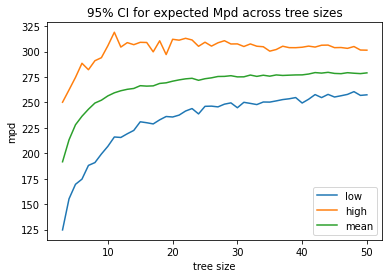

In [130]:
#print(average_mpd_rnd)

plt.plot(tree_sizes, new_CI_2[0])
plt.plot(tree_sizes, new_CI_2[1])
plt.plot(tree_sizes,new_CI_2[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.legend(labels2)
plt.savefig('pd_95CI.jpg', dpi=300)


In [39]:
CI_export_bootstrap = pd.DataFrame(new_CI_2)
CI_colnames = dict.keys(new_mpd)
CI_export_bootstrap.columns = CI_colnames
CI_export_bootstrap.index = ["Low", "High", "Mean"]
CI_export_bootstrap.to_csv("mpd_output_bootstrap_large.csv")


In [46]:
CI_export_bootstrap_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_bootstrap_mntd.columns = CI_colnames
CI_export_bootstrap_mntd.index = ["Low", "High", "Mean"]
CI_export_bootstrap_mntd.to_csv("mntd_output_bootstrap_large.csv")

                   0           1           2
mpd10     204.463720  294.237310  254.351177
mpd25     239.276267  306.549322  273.200676
mpd50     259.076900  299.943128  278.655261
mpd75     263.802600  298.574070  281.164877
mpd100    266.641172  296.312715  281.922264
mpd350    277.550120  293.661700  284.766678
mpd500    278.902140  291.201710  284.996554
mpd700    278.806100  291.229400  285.068657
mpd900    280.464045  290.208788  285.354417
mpd1000   280.994243  290.451200  285.785992
mpd2000   283.479300  290.274515  286.602714
mpd3000   285.300335  290.371170  287.768884
mpd4000   287.015085  290.682205  288.878811
mpd5000   288.202800  291.508200  289.832533
mpd6000   289.754405  292.608900  291.126389
mpd7000   291.076040  293.178485  292.157583
mpd8000   292.174015  294.068200  293.157555
mpd9000   293.133900  294.701500  293.888918
mpd10000  293.876400  294.957723  294.427390


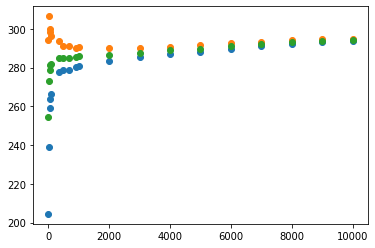

In [110]:
data = pd.DataFrame(pd.read_csv("mpd_output_bootstrap_large.csv"))
data_larger50 = data.drop(['Unnamed: 0'], axis=1)
data_larger50_T = data_larger50.T
print(data_larger50_T)
tree_sizes_large = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
plt.scatter(tree_sizes_large,data_larger50_T.iloc[:,0])
plt.scatter(tree_sizes_large,data_larger50_T.iloc[:,1])
plt.scatter(tree_sizes_large,data_larger50_T.iloc[:,2])




{'Unnamed: 0': {0: 'Low', 1: 'High', 2: 'Mean'}, 'mpd75': {0: 263.8026, 1: 298.57407, 2: 281.1648773547094}, 'mpd100': {0: 266.6411725, 1: 296.312715, 2: 281.9222642}, 'mpd350': {0: 277.55012, 1: 293.6617, 2: 284.7666784}, 'mpd500': {0: 278.90214, 1: 291.20171, 2: 284.99655440000004}, 'mpd700': {0: 278.8061, 1: 291.2294, 2: 285.0686566}, 'mpd900': {0: 280.464045, 1: 290.2087875, 2: 285.354417}, 'mpd1000': {0: 280.99424250000004, 1: 290.4512, 2: 285.7859924}, 'mpd2000': {0: 283.4793, 1: 290.274515, 2: 286.6027138}, 'mpd3000': {0: 285.300335, 1: 290.37117, 2: 287.76888419999995}, 'mpd4000': {0: 287.015085, 1: 290.682205, 2: 288.8788114228457}, 'mpd5000': {0: 288.2028, 1: 291.5082, 2: 289.83253260000004}, 'mpd6000': {0: 289.754405, 1: 292.6089, 2: 291.1263886}, 'mpd7000': {0: 291.07604, 1: 293.178485, 2: 292.1575826}, 'mpd8000': {0: 292.174015, 1: 294.0682, 2: 293.1575552}, 'mpd9000': {0: 293.1339, 1: 294.7015, 2: 293.8889176}, 'mpd10000': {0: 293.8764, 1: 294.95772250000005, 2: 294.42738